# Electricity Exploratory data analysis
- In this ntoebook, I will do some EDA and data cleaning/transformation for Electricity data directory
### about the requirement dataset : 
- ```net_manager``` : code of regional network manager
- ```Purchase_area```: code of the area where the energy is purchased
- ```street```: Name of the street
- ```zipcode_from``` and ```zipcode_to```: 2 columns for the range of zipcodes covered, 4 numbers and 2 letters
- ```city```: Name of the city
- ```num_connections```: Number of connections in the range of zipcodes
- ```delivery_perc```: percentage of the net consumption of electricity or gas. The lower, the
more energy was given back to the grid (for example if you have solar panels)
- ```perc_of_active_connections```: Percentage of active connections in the zipcode range
- ```type_of_connection```: principal type of connection in the zipcode range. For electricity
is # fuses X # ampère. For gas is G4, G6, G10, G16, G25
- ```type_conn_perc```: percentage of presence of the principal type of connection in the
zipcode range
- ```annual_consume```: Annual consume. Kwh for electricity, m3 for gas
- ```annual_consume_lowtarif_perc```: Percentage of consume during the low tarif hours.
From 10 p.m. to 7 a.m. and during weekends.
- ```smartmeter_perc```: percentage of smartmeters in the zipcode ranges

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

data = os.path.abspath(os.path.join('..'))
if data not in sys.path:
    sys.path.append(data)

### First, I will walkthrough each file and create "year" column 

In [2]:
Ecoteq_2018 = pd.read_csv('C:/TaiLieuHocTap/RMIT/C-2023/BigData/asignment2/EEET2574_Assignment2_data/Electricity/coteq_electricity_2018.csv', sep=',')
# add a year column                                                                                                                                                                                                                                                                                                                                     
Ecoteq_2018['year'] = 2018
Ecoteq_2019 = pd.read_csv('C:/TaiLieuHocTap/RMIT/C-2023/BigData/asignment2/EEET2574_Assignment2_data/Electricity/coteq_electricity_2019.csv', sep=',')
Ecoteq_2019['year'] = 2019
Ecoteq_2020 = pd.read_csv('C:/TaiLieuHocTap/RMIT/C-2023/BigData/asignment2/EEET2574_Assignment2_data/Electricity/coteq_electricity_2020.csv', sep=',')
Ecoteq_2020['year'] = 2020

In [3]:
print("Coteq 2018 data columns :\n",Ecoteq_2018.columns,'\n',
      "Coteq 2019 data columns :\n",Ecoteq_2019.columns,'\n',
      "Coteq 2020 data columns :\n",Ecoteq_2020.columns,'\n'
)

Coteq 2018 data columns :
 Index(['net_manager', 'purchase_area', 'street', 'zipcode_from', 'zipcode_to',
       'city', 'num_connections', 'delivery_perc',
       'perc_of_active_connections', 'type_conn_perc', 'type_of_connection',
       'annual_consume', 'annual_consume_lowtarif_perc', 'smartmeter_perc',
       'year'],
      dtype='object') 
 Coteq 2019 data columns :
 Index(['net_manager', 'purchase_area', 'street', 'zipcode_from', 'zipcode_to',
       'city', 'num_connections', 'delivery_perc',
       'perc_of_active_connections', 'type_conn_perc', 'type_of_connection',
       'annual_consume', 'annual_consume_lowtarif_perc', 'smartmeter_perc',
       'year'],
      dtype='object') 
 Coteq 2020 data columns :
 Index(['net_manager', 'purchase_area', 'street', 'zipcode_from', 'zipcode_to',
       'city', 'num_connections', 'delivery_perc',
       'perc_of_active_connections', 'type_conn_perc', 'type_of_connection',
       'annual_consume', 'annual_consume_lowtarif_perc', 'smartmet

In [4]:
Ecoteq_merge = pd.concat([Ecoteq_2018, Ecoteq_2019, Ecoteq_2020], ignore_index=True)
Ecoteq_merge.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year
0,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Dorpsstraat,7468CP,7471AA,ENTER,19,89.47,94.74,89,1x35,4122,89.47,0.0,2018
1,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AB,7471AB,GOOR,37,100.00,100.00,86,1x35,1800,94.59,0.0,2018
2,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AC,7471AC,GOOR,16,100.00,100.00,100,1x35,1315,100.00,0.0,2018
3,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AD,7471AE,GOOR,25,92.00,84.00,44,1x35,6379,92.00,0.0,2018
4,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Kerkstraat,7471AG,7471AG,GOOR,14,85.71,100.00,36,1x35,4404,92.86,0.0,2018


So, we have 2 values for net_manager in netherland 
- Cogas Infra & Beheer BV    
- Coteq Netbeheer BV         


In [5]:
Estedin_2018 = pd.read_csv('C:/TaiLieuHocTap/RMIT/C-2023/BigData/asignment2/EEET2574_Assignment2_data/Electricity/stedin_electricity_2018.csv', sep=',')
Estedin_2018['year'] = 2018
Estedin_2019 = pd.read_csv('C:/TaiLieuHocTap/RMIT/C-2023/BigData/asignment2/EEET2574_Assignment2_data/Electricity/stedin_electricity_2019.csv', sep=',')
Estedin_2019['year'] = 2019
Estedin_2020 = pd.read_csv('C:/TaiLieuHocTap/RMIT/C-2023/BigData/asignment2/EEET2574_Assignment2_data/Electricity/stedin_electricity_2020.csv', sep=',')
Estedin_2020['year'] = 2020


In [6]:
print("Estedin 2018 data columns : \n",Estedin_2018.columns,'\n',
        "Estedin 2019 data columns \n:",Estedin_2019.columns,'\n',
        "Estedin 2020 data columns \n:",Estedin_2020.columns,'\n'
        )

Estedin 2018 data columns : 
 Index(['net_manager', 'purchase_area', 'street', 'zipcode_from', 'zipcode_to',
       'city', 'num_connections', 'delivery_perc',
       'perc_of_active_connections', 'type_conn_perc', 'type_of_connection',
       'annual_consume', 'annual_consume_lowtarif_perc', 'smartmeter_perc',
       'year'],
      dtype='object') 
 Estedin 2019 data columns 
: Index(['net_manager', 'purchase_area', 'street', 'zipcode_from', 'zipcode_to',
       'city', 'num_connections', 'delivery_perc',
       'perc_of_active_connections', 'type_conn_perc', 'type_of_connection',
       'annual_consume', 'annual_consume_lowtarif_perc', 'smartmeter_perc',
       'year'],
      dtype='object') 
 Estedin 2020 data columns 
: Index(['net_manager', 'purchase_area', 'street', 'zipcode_from', 'zipcode_to',
       'city', 'num_connections', 'delivery_perc',
       'perc_of_active_connections', 'type_conn_perc', 'type_of_connection',
       'annual_consume', 'annual_consume_lowtarif_perc', 's

- There is one columns which not in the requirements which is ```STANDAARDDEVIATIE``` --> remove it 

In [7]:
# drop the STANDAARDDEVIATIE column
Estedin_2020 = Estedin_2020.drop(["STANDAARDDEVIATIE"], axis=1)
Estedin_2020.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year
0,8716874000009,Stedin Utrecht,Egelshoek,1213RC,1231AA,HILVERSUM,14,92.86,92.86,78.57,3x25,6245.43,85.71,57.14,2020
1,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AB,1231AB,LOOSDRECHT,17,76.47,100.00,82.35,3x25,5211.41,100.00,94.12,2020
2,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AC,1231AC,LOOSDRECHT,17,100.00,100.00,41.18,1x25,3236.12,100.00,88.24,2020
3,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AD,1231AD,LOOSDRECHT,17,94.12,100.00,47.06,3x25,3778.47,94.12,88.24,2020
4,8716874000009,Stedin Utrecht,Jan Steenlaan,1231AE,1231AE,LOOSDRECHT,20,95.00,100.00,45.00,3x25,3897.70,95.00,85.00,2020


In [8]:
Estedin_merge = pd.concat([Estedin_2018, Estedin_2019, Estedin_2020])
Estedin_merge.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year
0,8716874000009,Stedin Utrecht,Gijsbrecht van Amstelln,1181EJ,1231AB,AMSTELVEEN,33,93.94,90.91,76.0,3x25,5926.0,84.85,21.21,2018
1,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AC,1231AC,LOOSDRECHT,17,100.00,100.00,41.0,1x25,3149.0,76.47,17.65,2018
2,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AD,1231AD,LOOSDRECHT,17,100.00,100.00,47.0,3x25,3906.0,76.47,5.88,2018
3,8716874000009,Stedin Utrecht,Jan Steenlaan,1231AE,1231AE,LOOSDRECHT,20,100.00,100.00,45.0,3x25,4696.0,85.00,15.00,2018
4,8716874000009,Stedin Utrecht,Pieter de Hooghlaan,1231AG,1231AG,LOOSDRECHT,17,94.12,100.00,71.0,1x25,3557.0,64.71,5.88,2018


In [9]:
# check for net_manager values
Estedin_merge['net_manager'].value_counts()

net_manager
8716892000005    135111
8716874000009     78308
8716886000004     19893
8716921000006     13107
8716925000002      4776
8716946000005      2026
8716924000003        16
Name: count, dtype: int64

### I don't really understand it, but I thinks this is the list of net_manager company in Netherland
<https://www.acm.nl/sites/default/files/old_publication/bijlagen/4168_102669_Brief_Informatieverzoek_m.b.t._stuurinformatie_16_augustus_2010.pdf>
* findings: the above ner_manager id from Stedin B.V company. I will replace the id with real company name to match with the whole dataset

In [10]:
# Replace id_number into net_manager name 
Estedin_merge['net_manager'] = 'Stedin B.V.'
Estedin_merge.head(10)

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year
0,Stedin B.V.,Stedin Utrecht,Gijsbrecht van Amstelln,1181EJ,1231AB,AMSTELVEEN,33,93.94,90.91,76.0,3x25,5926.0,84.85,21.21,2018
1,Stedin B.V.,Stedin Utrecht,Rembrandtlaan,1231AC,1231AC,LOOSDRECHT,17,100.00,100.00,41.0,1x25,3149.0,76.47,17.65,2018
2,Stedin B.V.,Stedin Utrecht,Rembrandtlaan,1231AD,1231AD,LOOSDRECHT,17,100.00,100.00,47.0,3x25,3906.0,76.47,5.88,2018
3,Stedin B.V.,Stedin Utrecht,Jan Steenlaan,1231AE,1231AE,LOOSDRECHT,20,100.00,100.00,45.0,3x25,4696.0,85.00,15.00,2018
4,Stedin B.V.,Stedin Utrecht,Pieter de Hooghlaan,1231AG,1231AG,LOOSDRECHT,17,94.12,100.00,71.0,1x25,3557.0,64.71,5.88,2018
5,Stedin B.V.,Stedin Utrecht,Paulus Potterlaan,1231AH,1231AH,LOOSDRECHT,22,90.91,100.00,41.0,3x25,4121.0,86.36,18.18,2018
6,Stedin B.V.,Stedin Utrecht,Van Mierislaan,1231AJ,1231AJ,LOOSDRECHT,23,95.65,100.00,52.0,1x25,3277.0,73.91,13.04,2018
7,Stedin B.V.,Stedin Utrecht,Van Ostadelaan,1231AK,1231AK,LOOSDRECHT,21,80.95,100.00,62.0,3x25,3471.0,76.19,28.57,2018
8,Stedin B.V.,Stedin Utrecht,Van der Helstlaan,1231AL,1231AL,LOOSDRECHT,17,88.24,100.00,47.0,3x25,4201.0,94.12,11.76,2018
9,Stedin B.V.,Stedin Utrecht,Van der Helstlaan,1231AM,1231AM,LOOSDRECHT,12,100.00,100.00,42.0,1x25,4154.0,83.33,8.33,2018


In [11]:
Ewestland_2018 = pd.read_csv('C:/TaiLieuHocTap/RMIT/C-2023/BigData/asignment2/EEET2574_Assignment2_data/Electricity/westland-infra_electricity_2018.csv', sep=',')
Ewestland_2018['year'] = 2018
Ewestland_2019 = pd.read_csv('C:/TaiLieuHocTap/RMIT/C-2023/BigData/asignment2/EEET2574_Assignment2_data/Electricity/westland-infra_electricity_2019.csv', sep=',')
Ewestland_2019['year'] = 2019
Ewestland_2020 = pd.read_csv('C:/TaiLieuHocTap/RMIT/C-2023/BigData/asignment2/EEET2574_Assignment2_data/Electricity/westland-infra_electricity_2020.csv', sep=',')
Ewestland_2020['year'] = 2020

In [12]:
print("Ewestland 2018 data columns \n:",Ewestland_2018.columns,'\n',
        "Ewestland 2019 data columns \n:",Ewestland_2019.columns,'\n',
        "Ewestland 2020 data columns \n:",Ewestland_2020.columns,'\n'
        )

Ewestland 2018 data columns 
: Index(['net_manager', 'purchase_area', 'street', 'zipcode_from', 'zipcode_to',
       'city', 'delivery_perc', 'perc_of_active_connections',
       '%Defintieve aansl (NRM)', 'type_conn_perc', 'type_of_connection',
       'annual_consume', 'annual_consume_lowtarif_perc', 'smartmeter_perc',
       'num_connections', 'year'],
      dtype='object') 
 Ewestland 2019 data columns 
: Index(['net_manager', 'purchase_area', 'street', 'zipcode_from', 'zipcode_to',
       'city', 'delivery_perc', 'perc_of_active_connections',
       '%Defintieve aansl (NRM)', 'type_conn_perc', 'type_of_connection',
       'annual_consume', 'annual_consume_lowtarif_perc', 'smartmeter_perc',
       'num_connections', 'year'],
      dtype='object') 
 Ewestland 2020 data columns 
: Index(['net_manager', 'purchase_area', 'street', 'zipcode_from', 'zipcode_to',
       'city', 'delivery_perc', 'perc_of_active_connections',
       '%Defintieve aansl (NRM)', 'type_conn_perc', 'type_of_conne

In [13]:
Ewestland_merge = pd.concat([Ewestland_2018, Ewestland_2019, Ewestland_2020])
Ewestland_merge = Ewestland_merge.drop(["%Defintieve aansl (NRM)"], axis=1)
Ewestland_merge.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,num_connections,year
0,westland-infra,871687800090000015,OOSTEINDE,2291AA,2291AE,WATERINGEN,89.66,100.00,59,3x25,7029,96.55,72.41,29,2018
1,westland-infra,871687800090000015,WATERPARK,2291AK,2291AK,WATERINGEN,87.50,100.00,63,1x35,5411,100.00,82.50,40,2018
2,westland-infra,871687800090000015,AZALEAPARK,2291AL,2291AL,WATERINGEN,100.00,100.00,86,1x35,3239,100.00,96.55,29,2018
3,westland-infra,871687800090000015,DRUIVENLAAN,2291AN,2291AT,WATERINGEN,69.05,97.62,71,3x25,5364,100.00,88.10,42,2018
4,westland-infra,871687800090000015,KWAKLAAN,2291AV,2291AV,WATERINGEN,100.00,100.00,81,1x35,2949,100.00,87.50,16,2018


In [14]:
Ewestland_merge['net_manager'].value_counts()

net_manager
westland-infra    7399
Name: count, dtype: int64

In [15]:
Ewestland_merge['purchase_area'].value_counts()

purchase_area
871687800090000015    7399
Name: count, dtype: int64

- We need to modify the purchase_area value into specific name (to match with the dataset)
- According to https://arno.uvt.nl/show.cgi?fid=158627, id 871687800090000015 stand for westland. So I will the value by westland

In [16]:
Ewestland_merge['purchase_area'] = "Westland"
Ewestland_merge

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,num_connections,year
0,westland-infra,Westland,OOSTEINDE,2291AA,2291AE,WATERINGEN,89.66,100.00,59,3x25,7029,96.55,72.41,29,2018
1,westland-infra,Westland,WATERPARK,2291AK,2291AK,WATERINGEN,87.50,100.00,63,1x35,5411,100.00,82.50,40,2018
2,westland-infra,Westland,AZALEAPARK,2291AL,2291AL,WATERINGEN,100.00,100.00,86,1x35,3239,100.00,96.55,29,2018
3,westland-infra,Westland,DRUIVENLAAN,2291AN,2291AT,WATERINGEN,69.05,97.62,71,3x25,5364,100.00,88.10,42,2018
4,westland-infra,Westland,KWAKLAAN,2291AV,2291AV,WATERINGEN,100.00,100.00,81,1x35,2949,100.00,87.50,16,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,westland-infra,Westland,IN DE BALIJE,3155XA,3155XA,MAASLAND,92.86,100.00,86,3x25,6313,100.00,85.71,14,2020
2553,westland-infra,Westland,KONINGIN JULIANAWEG,3155XB,3155XB,MAASLAND,92.86,100.00,64,3x25,4966,100.00,100.00,14,2020
2554,westland-infra,Westland,KONINGIN JULIANAWEG,3155XC,3155XD,MAASLAND,75.86,100.00,69,3x25,7293,100.00,82.76,29,2020
2555,westland-infra,Westland,KONINGIN JULIANAWEG,3155XE,3155XH,MAASLAND,75.00,100.00,71,3x25,3194,96.43,60.71,28,2020


In [17]:
#Merge 9 dataset
Electricity = pd.concat([Ecoteq_2018, Ecoteq_2019, Ecoteq_2020, 
                         Estedin_merge, Ewestland_merge], ignore_index=True)
Electricity.head() 

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year
0,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Dorpsstraat,7468CP,7471AA,ENTER,19,89.47,94.74,89.0,1x35,4122.0,89.47,0.0,2018
1,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AB,7471AB,GOOR,37,100.00,100.00,86.0,1x35,1800.0,94.59,0.0,2018
2,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AC,7471AC,GOOR,16,100.00,100.00,100.0,1x35,1315.0,100.00,0.0,2018
3,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AD,7471AE,GOOR,25,92.00,84.00,44.0,1x35,6379.0,92.00,0.0,2018
4,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Kerkstraat,7471AG,7471AG,GOOR,14,85.71,100.00,36.0,1x35,4404.0,92.86,0.0,2018


In [18]:
#check for columns name to ensure that all columns are the same with the given requirements
Electricity.columns 

Index(['net_manager', 'purchase_area', 'street', 'zipcode_from', 'zipcode_to',
       'city', 'num_connections', 'delivery_perc',
       'perc_of_active_connections', 'type_conn_perc', 'type_of_connection',
       'annual_consume', 'annual_consume_lowtarif_perc', 'smartmeter_perc',
       'year'],
      dtype='object')

### Since the dataset is collected from a vary if company, I will chek each column first

In [19]:
# check for net_manager value
Electricity['net_manager'].value_counts()

net_manager
Stedin B.V.                253237
westland-infra               7399
Cogas Infra & Beheer BV      5138
Coteq Netbeheer BV           2503
Name: count, dtype: int64

In [20]:
Electricity['purchase_area'].value_counts()

purchase_area
Stedin                                    134726
Stedin Utrecht                             78542
Stedin Delfland                            20150
Stedin Midden-Holland                      13003
Netbeheerder Centraal Overijssel B.V.       7641
Westland                                    7399
Stedin Schiedam                             4775
Stedin Elektriciteit Zuid-Kennemerland      2025
Stedin Weert                                  16
Name: count, dtype: int64

In [49]:
Estreet = Electricity['street'].value_counts()
Estreet

street
dorpsstraat              513
kerkstraat               375
laan van meerdervoort    332
rembrandtlaan            324
sportlaan                313
                        ... 
rijswaardsedijk            1
oudenhil                   1
oude nieuwlandseweg        1
h'oranjeweg                1
otter                      1
Name: count, Length: 30064, dtype: int64

### briefly dataset eda

In [22]:
# check for dataset information
Electricity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268277 entries, 0 to 268276
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   net_manager                   268277 non-null  object 
 1   purchase_area                 268277 non-null  object 
 2   street                        268277 non-null  object 
 3   zipcode_from                  268277 non-null  object 
 4   zipcode_to                    268277 non-null  object 
 5   city                          268277 non-null  object 
 6   num_connections               268277 non-null  int64  
 7   delivery_perc                 268277 non-null  float64
 8   perc_of_active_connections    268277 non-null  float64
 9   type_conn_perc                268277 non-null  float64
 10  type_of_connection            268277 non-null  object 
 11  annual_consume                268277 non-null  float64
 12  annual_consume_lowtarif_perc  268277 non-nul

In [23]:
Electricity.shape

(268277, 15)

In [24]:
Electricity.describe()

,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year
count,268277.000000,268277.000000,268277.000000,268277.000000,268277.000000,268277.000000,268277.000000,268277.000000
mean,24.918543,93.555226,98.010657,79.268298,3879.876300,88.760369,58.271967,2019.006538
std,18.622440,11.621118,8.053053,18.930513,3263.593038,17.237478,31.045590,0.821784
min,7.000000,0.000000,0.000000,16.670000,0.000000,0.000000,0.000000,2018.000000
25%,16.000000,91.110000,100.000000,64.000000,2358.500000,84.380000,29.410000,2018.000000
50%,21.000000,100.000000,100.000000,85.000000,3069.000000,96.150000,67.650000,2019.000000
75%,27.000000,100.000000,100.000000,95.120000,4006.350000,100.000000,84.210000,2020.000000
max,1146.000000,100.000000,100.000000,100.000000,110857.000000,100.000000,100.000000,2020.000000


# truoc khi train, style lai distribution of numerical columns 

- find meanings of the above statistical 

In [25]:
Electricity.isnull().sum()

net_manager                     0
purchase_area                   0
street                          0
zipcode_from                    0
zipcode_to                      0
city                            0
num_connections                 0
delivery_perc                   0
perc_of_active_connections      0
type_conn_perc                  0
type_of_connection              0
annual_consume                  0
annual_consume_lowtarif_perc    0
smartmeter_perc                 0
year                            0
dtype: int64

- NMA CO RAT NHIEU 0

## Observation :
- dataset containt no null value 
- 15 columns (14 + Year )
- numerical (we can use as features) columns: num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,annual_consume, annual_consume_lowtarif_perc,smartmeter_perc
- nominal values: net_manager, purchase_area, street, city

In [27]:
Electricity.dtypes

net_manager                      object
purchase_area                    object
street                           object
zipcode_from                     object
zipcode_to                       object
city                             object
num_connections                   int64
delivery_perc                   float64
perc_of_active_connections      float64
type_conn_perc                  float64
type_of_connection               object
annual_consume                  float64
annual_consume_lowtarif_perc    float64
smartmeter_perc                 float64
year                              int64
dtype: object

### Apply float data type into num_connections

In [28]:
# apply float to num_connections column
Electricity['num_connections'] = Electricity['num_connections'].astype(float)
Electricity.dtypes

net_manager                      object
purchase_area                    object
street                           object
zipcode_from                     object
zipcode_to                       object
city                             object
num_connections                 float64
delivery_perc                   float64
perc_of_active_connections      float64
type_conn_perc                  float64
type_of_connection               object
annual_consume                  float64
annual_consume_lowtarif_perc    float64
smartmeter_perc                 float64
year                              int64
dtype: object

##### The ```street``` and ```city``` columns contain differences variables so I will dig into those two columns  

In [31]:
Electricity['city'].value_counts()

city
'S-GRAVENHAGE    34845
ROTTERDAM        31307
UTRECHT          18219
AMERSFOORT        7875
ZOETERMEER        7608
                 ...  
NIEUWERBRUG          1
MAURIK               1
HAARLEM              1
AMSTELVEEN           1
'S GRAVENHAGE        1
Name: count, Length: 293, dtype: int64

In [50]:
cols = Electricity.columns[Electricity.dtypes == 'object'].tolist()
for column in cols:
    Electricity[column] = Electricity[column].str.replace(r'[^a-zA-Z0-9 ]', " ", regex=False) #replaced typos by whitespaces
    Electricity[column] = Electricity[column].str.replace('-', " ", regex=False) #replaced typos by whitespaces
    Electricity[column] = Electricity[column].str.replace('  ', " ", regex=False) 
    Electricityp[column] = Electricity[column].str.replace(' ', " ", regex=False)

- 'SâGRAVENHAGE and some city have '-' in name. I will replace 'SâGRAVENHAGE by 'S GRAVENHAGE
- Based on the grographical missknowledge of Netherlands and some brief researcg, I decided to keep the 't and 's, also the cities with '-'
- <https://www.quora.com/Why-do-some-Dutch-city-names-begin-with-the-s-s-Hertogenbosch-for-example>

In [51]:
# - 'SâGRAVENHAGE and some city have '-' in name. I will replace 'SâGRAVENHAGE by 'S GRAVENHAGE
Electricity['city'] = Electricity['city'].replace('SâGRAVENHAGE','S GRAVENHAGE')


In [ ]:
# a function count value for all columns
def count_values(df):
    for column in df.columns:
        print(df[column].value_counts())
        print('------------------------------------')
count_values(Electricity)

In [52]:
Electricity.dtypes

net_manager                      object
purchase_area                    object
street                           object
zipcode_from                     object
zipcode_to                       object
city                             object
num_connections                 float64
delivery_perc                   float64
perc_of_active_connections      float64
type_conn_perc                  float64
type_of_connection               object
annual_consume                  float64
annual_consume_lowtarif_perc    float64
smartmeter_perc                 float64
year                              int64
zipcode                          object
dtype: object

- not need to check duplicate

In [34]:
#check for extra whitespace in columns
def checkExtraWhiteSpace(ColName):
    Variable = [] 
    for anwser in Electricity[ColName].unique():
        for Com_Val in str(anwser).split(";"):
            if (Com_Val in Variable): 
                break
            words = Com_Val.split(" ")
            if ("" in words):
                print("Column '{}', variable '{}' contains extra whitespace.".format(ColName, Com_Val)
                )
                Variable.append(Com_Val)
                break
            
for column in Electricity.columns:
    if (str(Electricity[column].dtypes) == "object"):
        checkExtraWhiteSpace(column)

Column 'street', variable 'Schoolstraat ' contains extra whitespace.
Column 'street', variable 'Papaverweg ' contains extra whitespace.
Column 'street', variable 'Brielsemeer ' contains extra whitespace.
Column 'street', variable 'Baandershof ' contains extra whitespace.
Column 'street', variable 'Enge IJsselweg ' contains extra whitespace.
Column 'street', variable 'Japansetuinlaan ' contains extra whitespace.
Column 'street', variable 'Valutaboulevard ' contains extra whitespace.
Column 'street', variable 'Engelenweide ' contains extra whitespace.
Column 'street', variable 'Hoekelumseboslaan ' contains extra whitespace.
Column 'street', variable 'Zwijnsbergen ' contains extra whitespace.


In [35]:
# remove whitespaces from street column
Electricity['street'] = Electricity['street'].str.strip()

In [36]:
Electricity.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year
0,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Dorpsstraat,7468CP,7471AA,ENTER,19.0,89.47,94.74,89.0,1x35,4122.0,89.47,0.0,2018
1,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AB,7471AB,GOOR,37.0,100.00,100.00,86.0,1x35,1800.0,94.59,0.0,2018
2,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AC,7471AC,GOOR,16.0,100.00,100.00,100.0,1x35,1315.0,100.00,0.0,2018
3,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AD,7471AE,GOOR,25.0,92.00,84.00,44.0,1x35,6379.0,92.00,0.0,2018
4,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Kerkstraat,7471AG,7471AG,GOOR,14.0,85.71,100.00,36.0,1x35,4404.0,92.86,0.0,2018


In [37]:
# merge the zip_code from and zip_code to columns into one column
Electricity['zipcode'] = Electricity['zipcode_from'] + '-' + Electricity['zipcode_from']
# apply lowercase to net_manager, purchase_aream street and city columns
Electricity['net_manager'] = Electricity['net_manager'].str.lower()
Electricity['purchase_area'] = Electricity['purchase_area'].str.lower()
Electricity['street'] = Electricity['street'].str.lower()
Electricity['city'] = Electricity['city'].str.lower()
Electricity.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year,zipcode
0,coteq netbeheer bv,netbeheerder centraal overijssel b.v.,dorpsstraat,7468CP,7471AA,enter,19.0,89.47,94.74,89.0,1x35,4122.0,89.47,0.0,2018,7468CP-7468CP
1,coteq netbeheer bv,netbeheerder centraal overijssel b.v.,de stoevelaar,7471AB,7471AB,goor,37.0,100.00,100.00,86.0,1x35,1800.0,94.59,0.0,2018,7471AB-7471AB
2,coteq netbeheer bv,netbeheerder centraal overijssel b.v.,de stoevelaar,7471AC,7471AC,goor,16.0,100.00,100.00,100.0,1x35,1315.0,100.00,0.0,2018,7471AC-7471AC
3,coteq netbeheer bv,netbeheerder centraal overijssel b.v.,de stoevelaar,7471AD,7471AE,goor,25.0,92.00,84.00,44.0,1x35,6379.0,92.00,0.0,2018,7471AD-7471AD
4,coteq netbeheer bv,netbeheerder centraal overijssel b.v.,kerkstraat,7471AG,7471AG,goor,14.0,85.71,100.00,36.0,1x35,4404.0,92.86,0.0,2018,7471AG-7471AG


In [39]:
Electricity['num_connections'].value_counts()

num_connections
20.0     14735
18.0     14575
16.0     14082
19.0     12776
24.0     12749
         ...  
426.0        1
423.0        1
363.0        1
452.0        1
414.0        1
Name: count, Length: 353, dtype: int64

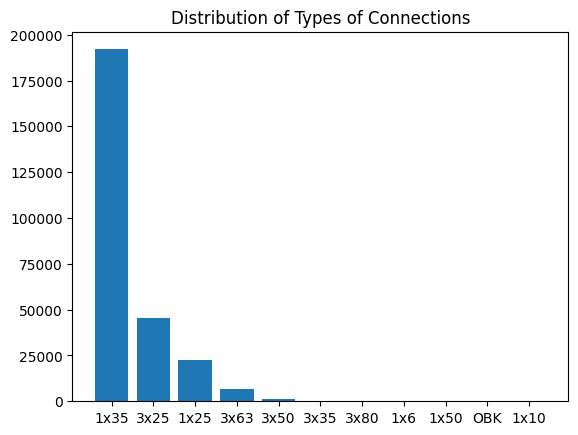

In [40]:
types = Electricity['type_of_connection'].unique()
counts = Electricity['type_of_connection'].value_counts()

# plt.pie(counts, labels=types, autopct='%1.1f%%', startangle=90)
# plt.title('Distribution of Types of Connections')
# plt.show()

# Create a bar chart to display the distribution of types of connections
plt.bar(range(len(types)), counts, align='center')
plt.xticks(range(len(types)), types)
plt.title('Distribution of Types of Connections')
plt.show()

In [41]:
# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder(categories='auto')

# encoder.fit(Electricity[['zipcode']])
# encoded_zips = encoder.transform(Electricity[['zipcode']]).toarray()
# Electricity = Electricity.join(pd.DataFrame(encoded_zips, columns=encoder.categories_[0], index=Electricity.index))

In [42]:
#number of rows
Electricity.shape

(268277, 16)

##### One-hot encoding: a process of converting categorical variables into binary vectors, where each category becomes a separate binary vector.
- A -> [1,0,0]
- B -> [0,1,0]
- C -> [0,0,1]
##### Label encoding is a process of assigning a unique integer value to each category in a categorical column.
- A -> 0
- B -> 1
- C -> 2

--> todo : 
- data visualization
- categorical : label encoding
- for zipcode: one-hot encoding 
- ordinal data
- data normalization 
#### While Nominal Data is classified without any intrinsic ordering or rank, Ordinal Data has some predetermined or natural order. Nominal data is qualitative or categorical data, while Ordinal data is considered “in-between” qualitative and quantitative data
--> clean, transform, split, model 
- fe>>model selection>>training>>validate
- Correlation between electricity consumption and other variables:
- annual_consumption by street
- annual_consumption by zip code (lam sao ta)
- A bar chart/line graph could be used to show the adoption rate of smart meters over time.
- we can consider smarmeter_perc as categorical dtypes

In [43]:
# import geopandas as gpd
# import folium

# # Convert the zipcode columns to a numerical format
# Electricity['zipcode_from'] = Electricity['zipcode_from'].str.replace(' ', '')
# Electricity['zipcode_to'] = Electricity['zipcode_to'].str.replace(' ', '')

# # Create a geodataframe from the dataframe and add the geometry column
# gEL = gpd.GeoDataFrame(Electricity, geometry=gpd.points_from_xy(Electricity['longitude'], Electricity['latitude']))

# # Create a map using the folium library
# m = folium.Map(location=[45.5236, -122.6750], zoom_start=10)

# # Add the geodataframe to the map
# m.add_child(gEL)

# # Create a choropleth map using the folium.Choropleth() function
# m.choropleth(
#     geo_data=gEL,
#     data=Electricity['annual_consume'],
#     columns=['annual_consume'],
#     key_on='feature.id',
#     fill_color='YlGnBu',
#     fill_opacity=0.7,
#     line_opacity=0.2,
#     legend_name='Annual Consume'
# )
# #display the map
# m

In [44]:
# save the merged dataset to a csv file
Electricity.to_csv('Electricity.csv', index=False)


In [45]:
type = Electricity['type_conn_perc'].value_counts()

In [ ]:
# heatmap to plot the correlation between columns 
plt.figure(figsize=(12,8))
sns.heatmap(Electricity.corr(), annot=True, cmap='viridis')
plt.show()
